In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings   


In [4]:
warnings.simplefilter('ignore')

%matplotlib inline
from matplotlib import rcParams
from matplotlib.cm import rainbow # On verra comment 

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
data = pd.read_csv('breast-cancer.csv')

In [8]:
type(data)

pandas.core.frame.DataFrame

Data preprocessing is extremely important because it allows improving the quality of the raw experimental data.

Therefore, to get the optimal solution set of preprocessing tasks applied as below code segment.

In [9]:
#data.iloc[:,1]
#data['id']
data.drop(['id'], axis = 1, inplace = True)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In most of the real-world datasets, there are always a few null values. However, no model can handle these NULL or NaN values on its own. Therefore it is needed to intervene as the below code segment.

In [10]:
# Donne des infos sur les valeurs null et les NaN pour un nettoyage au cas où les données ne seraient pas propre.
data.info() 
#regarder les Null
print("Nombre de null values " + str(sum(data.isnull().sum()))) # Aggrégé pour toutes les variables
#print("Nombre de null values " + str(data.isnull().sum())) # Liste des null pour chaque variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

As can be seen in the above figure, the dataset contains only 1 categorical column as diagnosis, except for the diagnosis column (that is M = malignant or B = benign) all other features are of type float64 and have 0 non-null numbers.

Les diagnostic sont rangé en int 64 au lieu de char

In [11]:
data.describe().transpose

<bound method DataFrame.transpose of        radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000

In [12]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


3.2 Data Visualization using Count Plot

The frequencies of the breast cancer stages are generated using a seaborn count plot. It is generated based on the diagnosis class of breast cancer as below.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

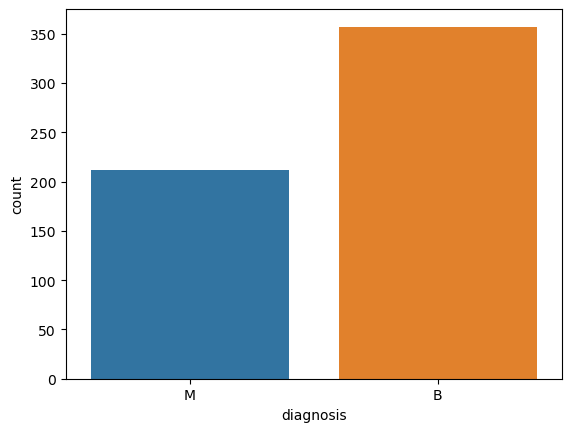

In [13]:
sns.countplot(data['diagnosis'], label = 'Count')

From the above figure of count plot graph, it clearly displays there is more number of benign (B) stage of cancer tumors in the data set which can be the cure.

#**3.3 Data Visualization using Scatter Plot**

Scatter plots are often to talk about how the variables relate to each other.

The following code segment is used to generate to see the correlation of the attributes in the data set.

In [14]:
#sns.pairplot(data = data, hue = 'diagnosis', palette= 'RdBu', kind = 'kde')

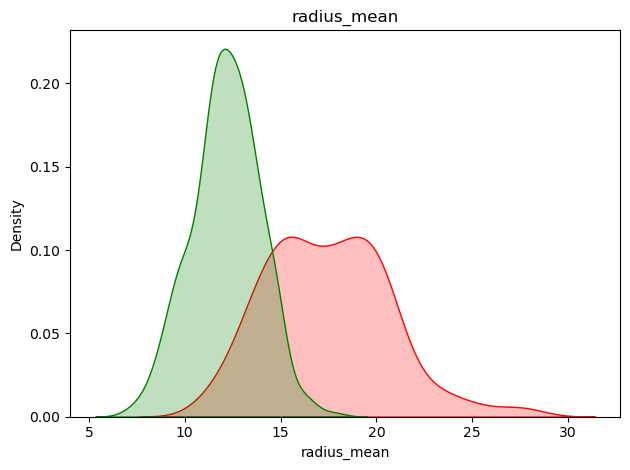

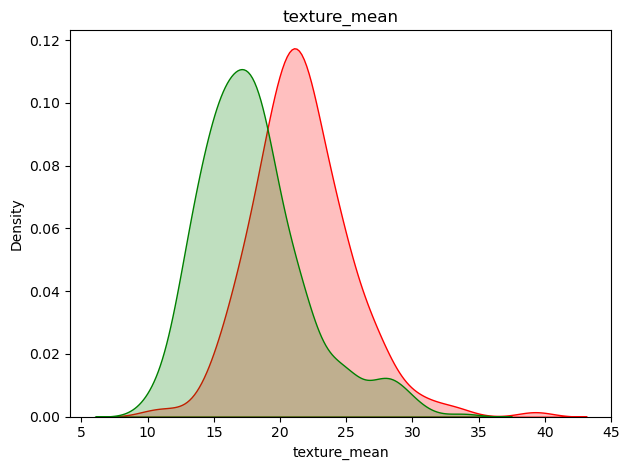

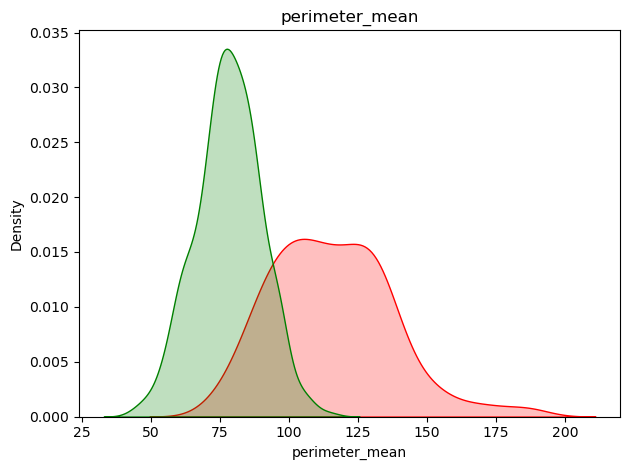

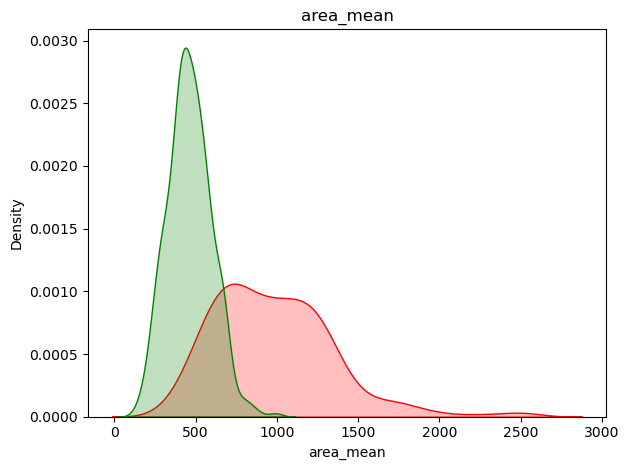

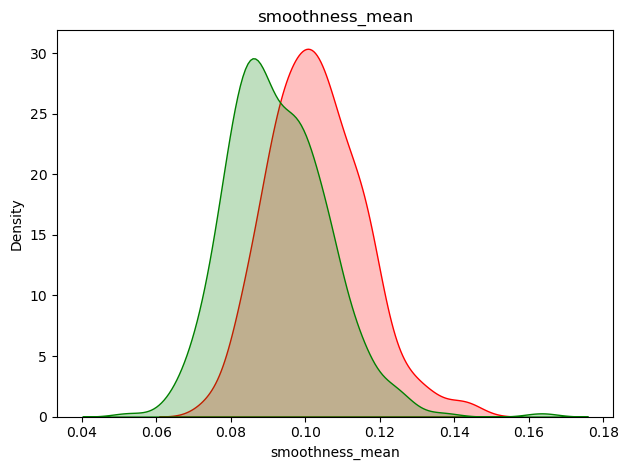

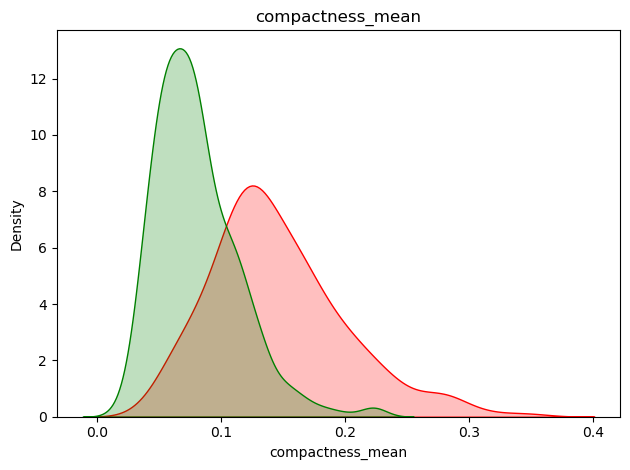

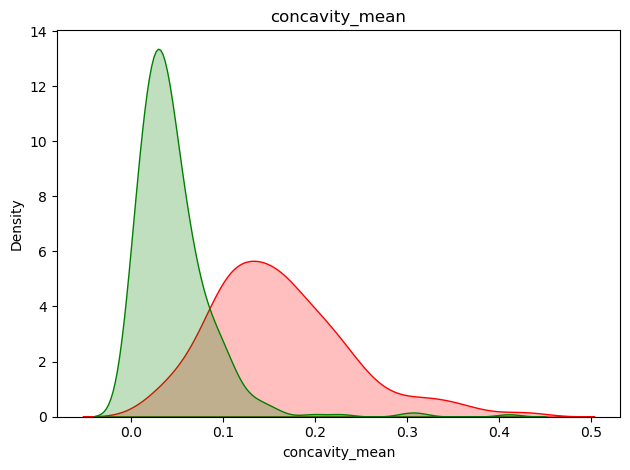

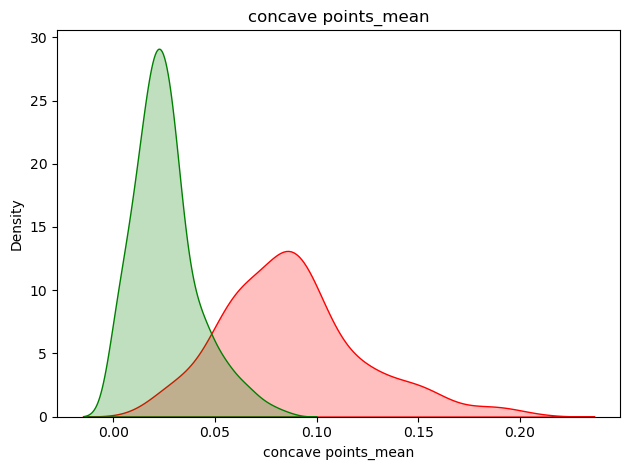

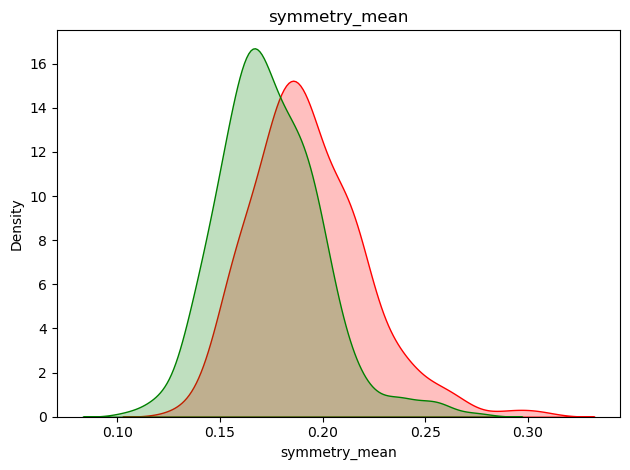

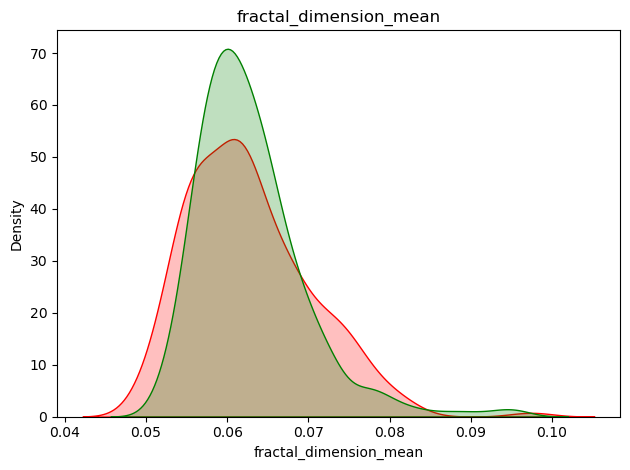

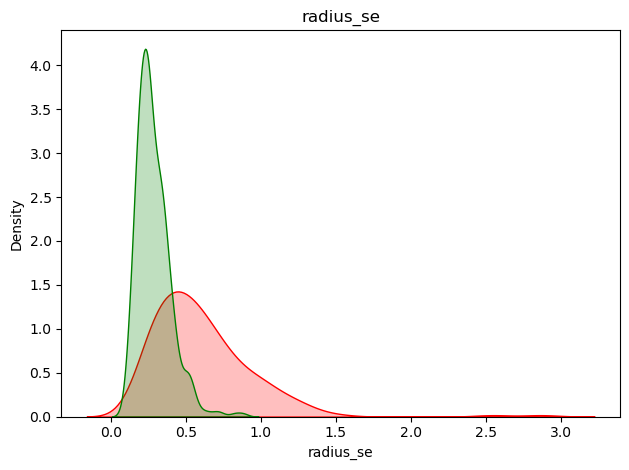

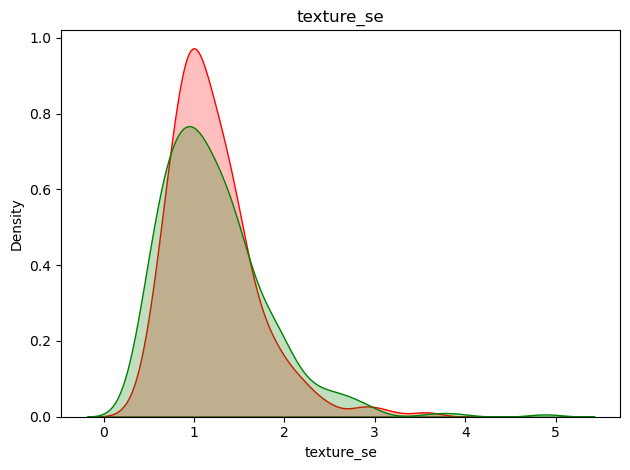

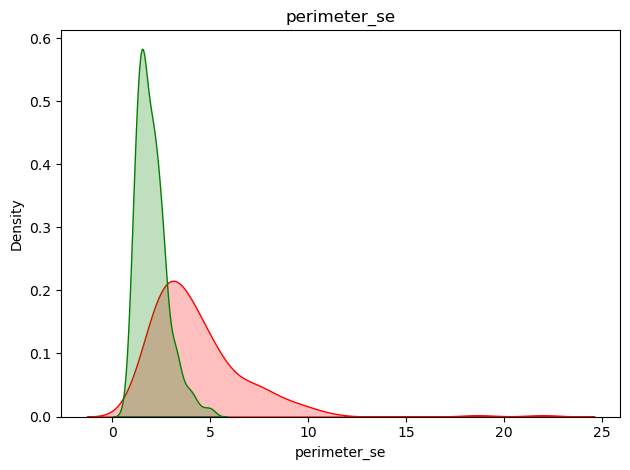

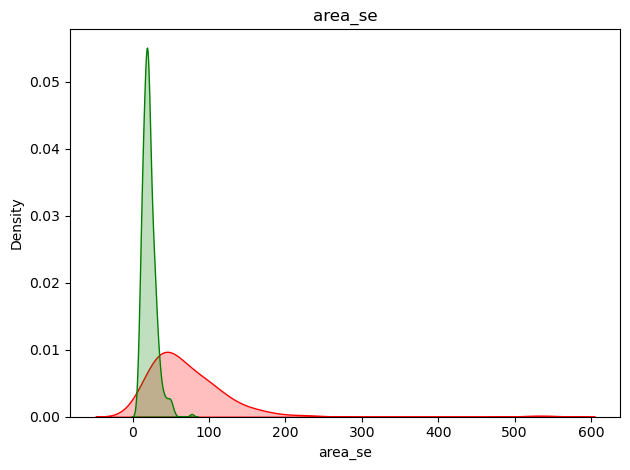

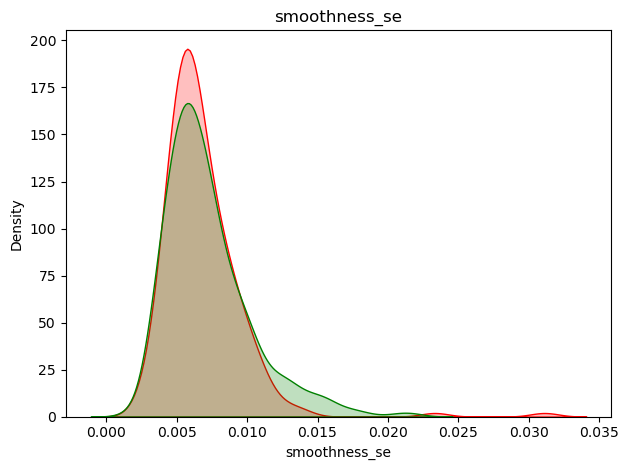

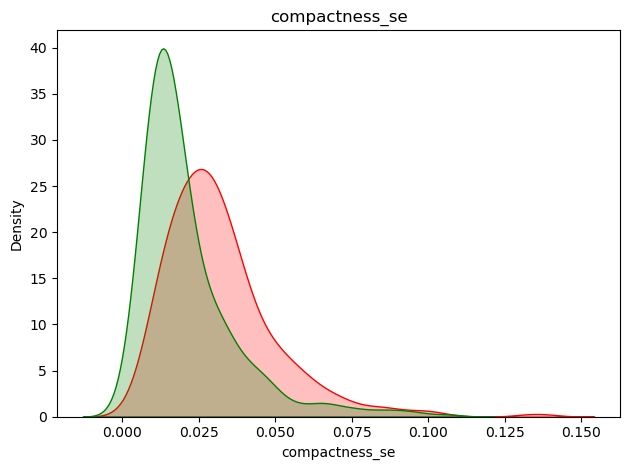

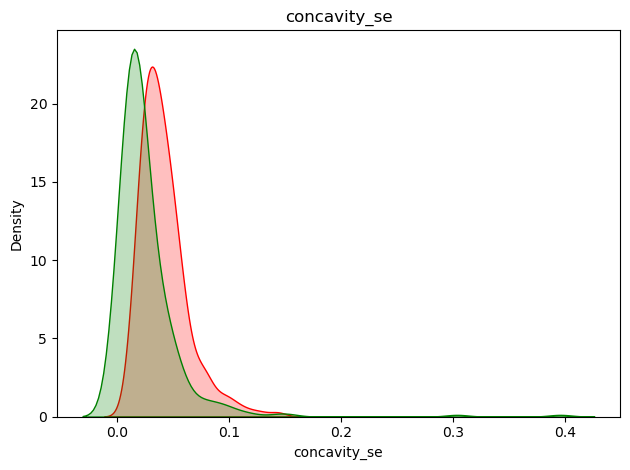

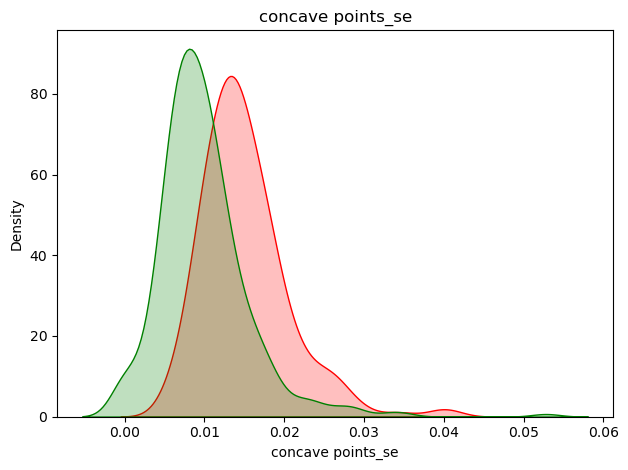

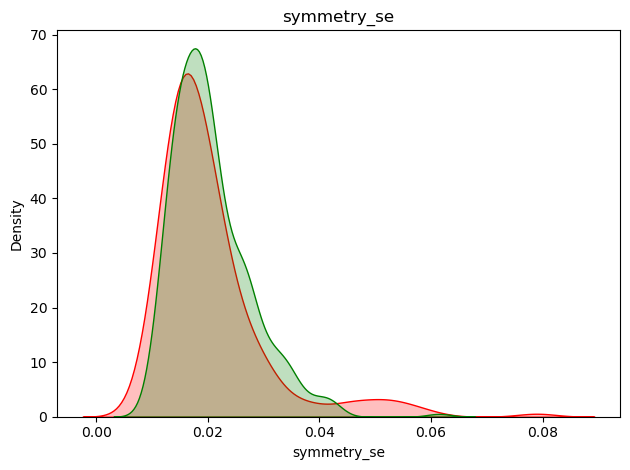

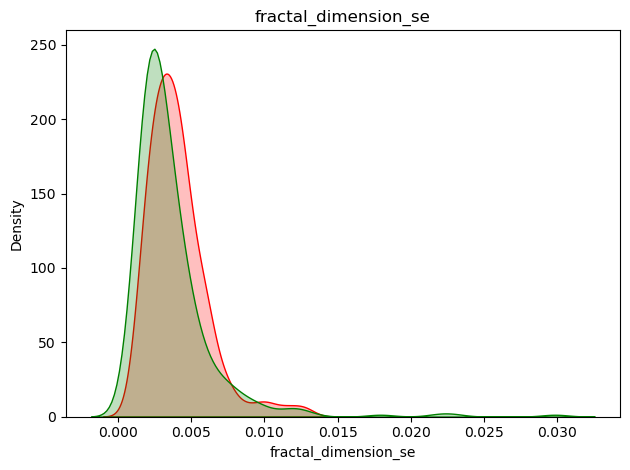

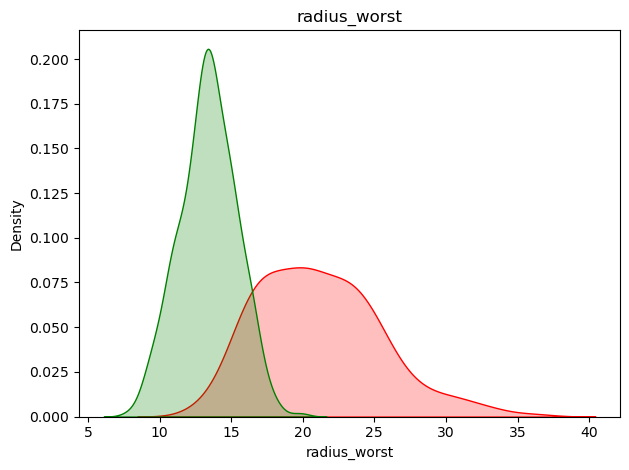

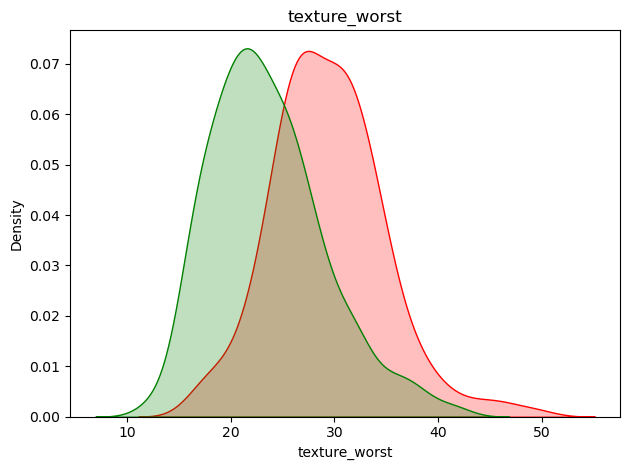

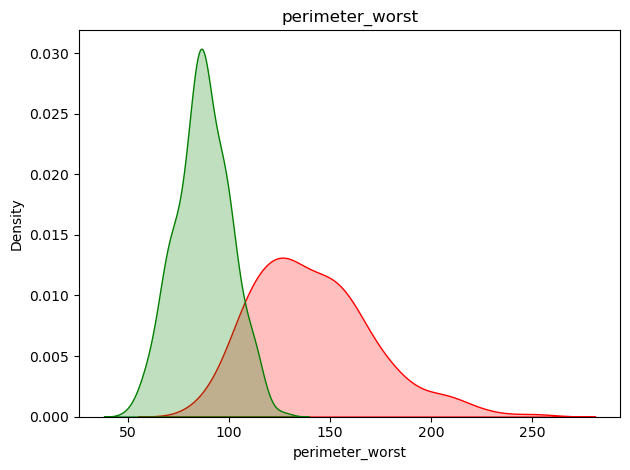

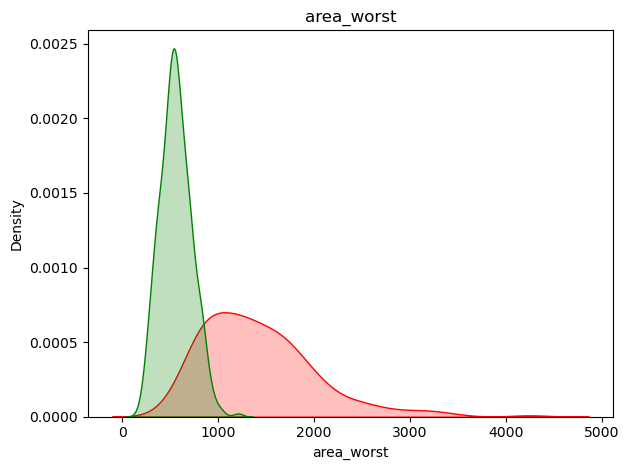

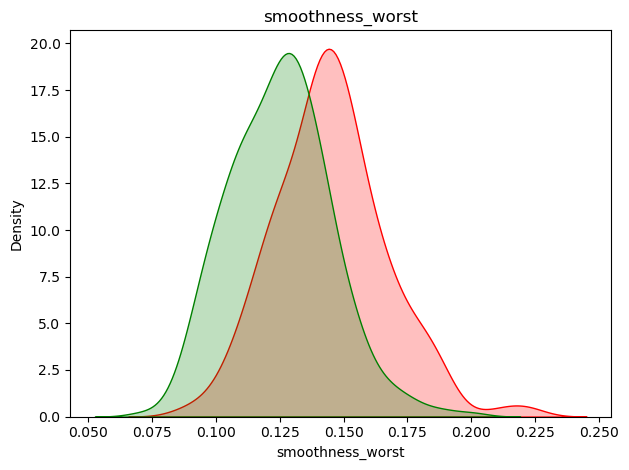

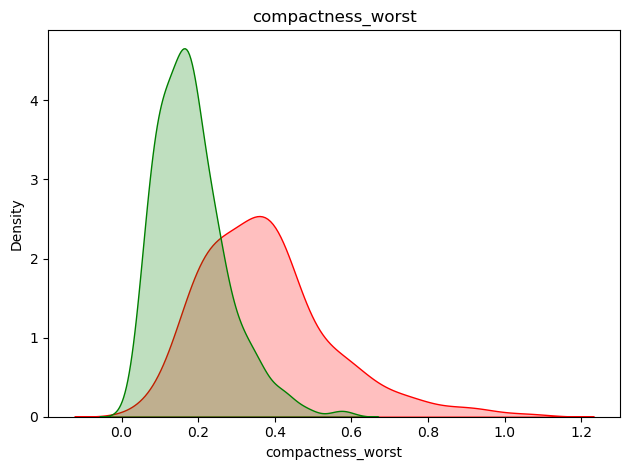

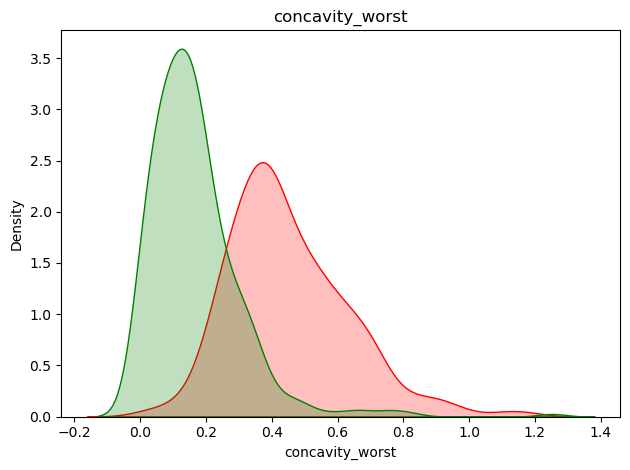

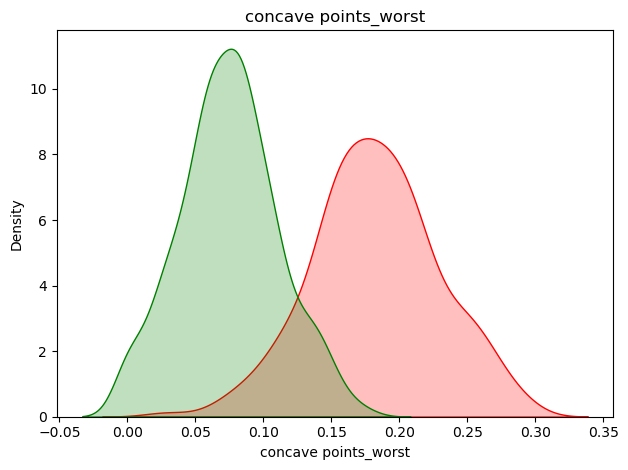

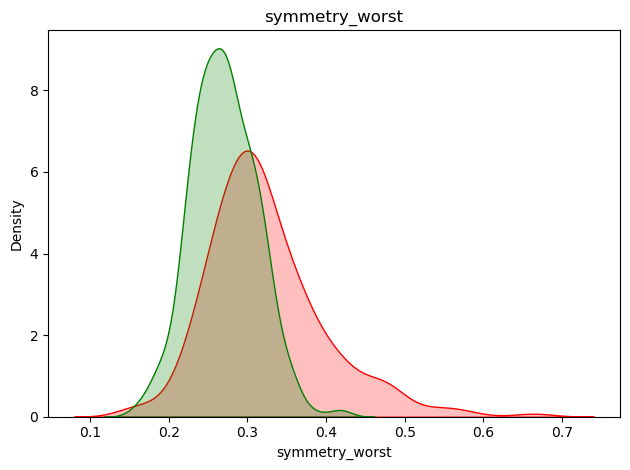

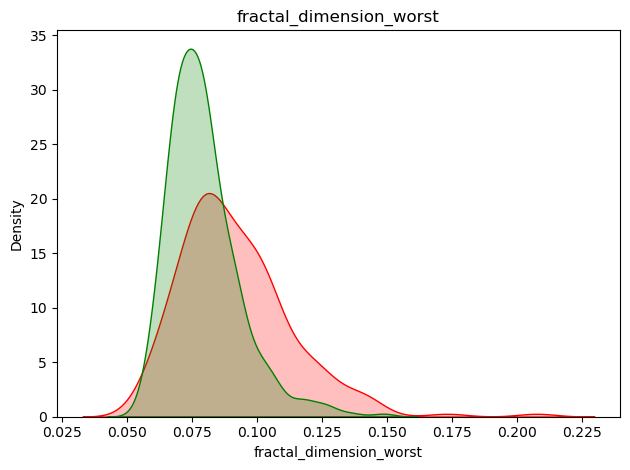

In [34]:
for col in data.columns :
    if col == 'diagnosis' :
        pass
    else :
        sns.kdeplot(data.loc[(data['diagnosis']== 'M'),col], color = 'red', shade = True, label = 'Malignant')
        sns.kdeplot(data.loc[(data['diagnosis']== 'B'), col], color = 'green', shade = True, label = 'Benign').set_title(col)
        
        plt.tight_layout()
        plt.show()

Ici on choisit des variable après avoir regardé leurs distribution univariée. Les variables qui permettent de bien discriminer les populations sont selectionnées. On le fait pour deux raison 1. Par ce que pour ce jeu test il n'est pas forcément necessaire beaucoup de variables et nous permet d'être plus parcimonieux. 2. cela nous permet d'alleger la compilation

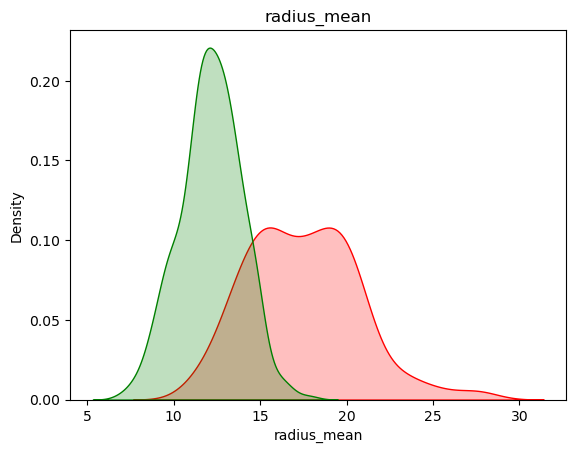

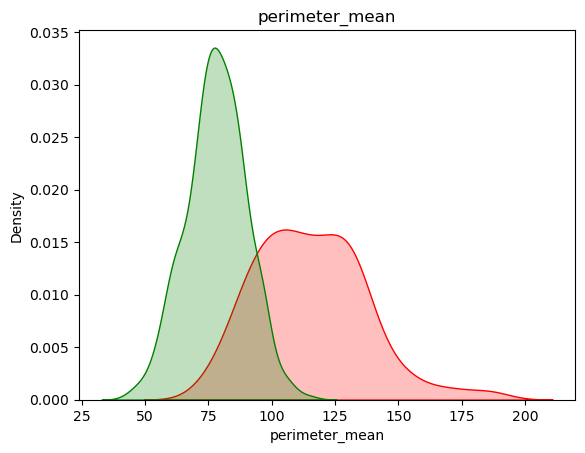

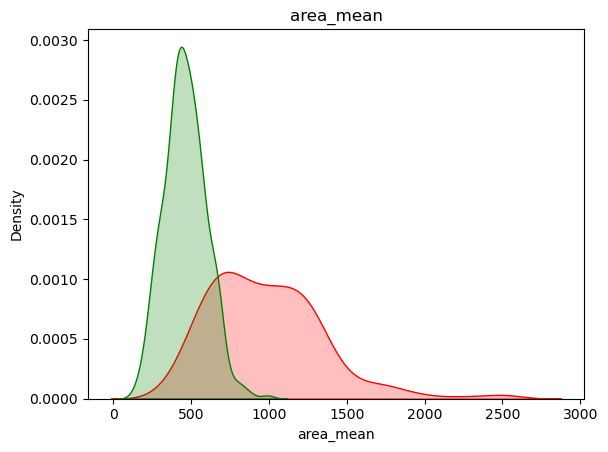

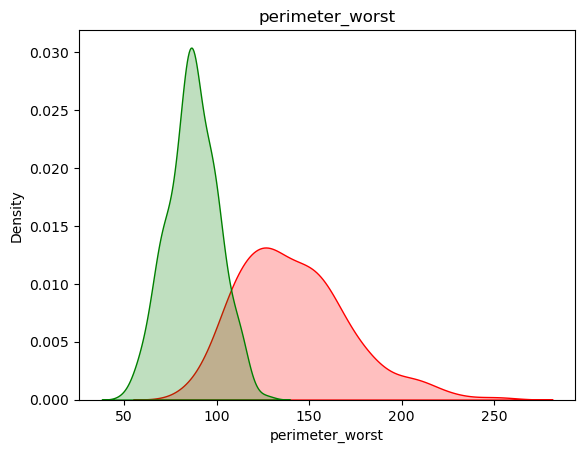

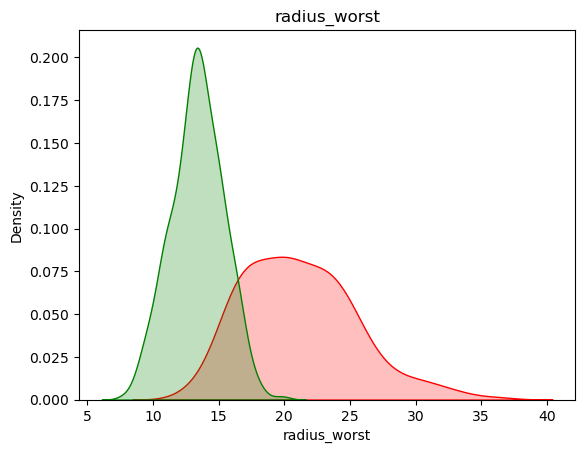

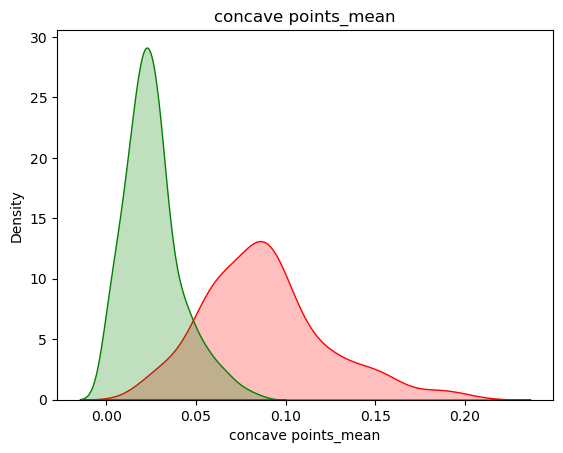

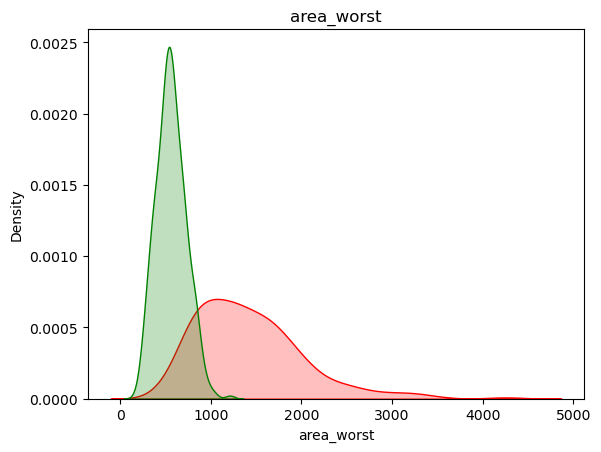

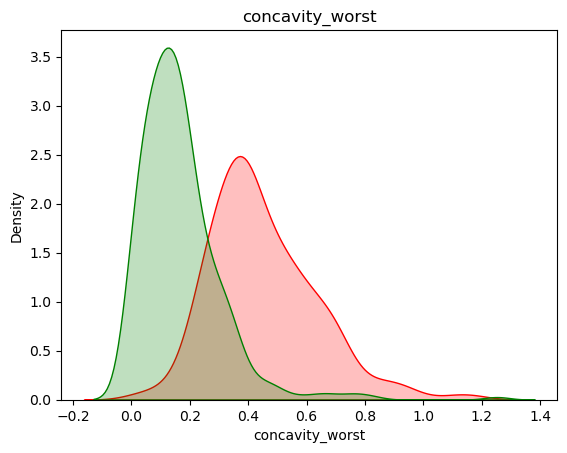

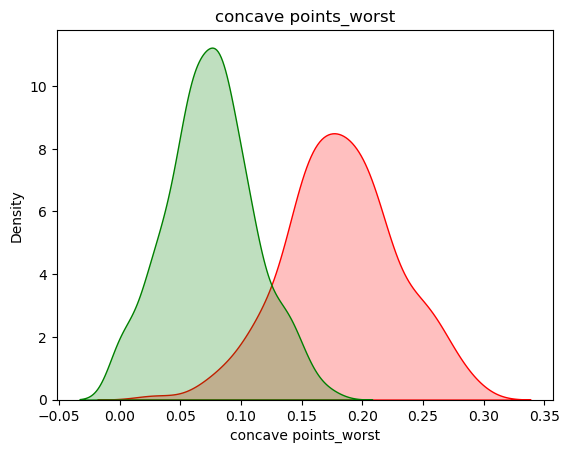

In [38]:
selected_var = ["radius_mean", "perimeter_mean", "area_mean", "perimeter_worst", "radius_worst", "concave points_mean", "area_worst", "concavity_worst", "concave points_worst"]

for col in selected_var :
    sns.kdeplot(data.loc[(data['diagnosis']== 'M'), col], color = 'red', shade = True, label = 'Malignant')
    sns.kdeplot(data.loc[(data['diagnosis']== 'B'), col], color = 'green', shade = True, label = 'Benign').set_title(col)
    plt.show()

As the observation of the above figure mean values of cell radius, perimeter, area, compactness, concavity, and concave points can be used in the classification of breast cancer. A larger value of these parameters tends to show a correlation with malignant tumors.
**3.4 Data Visualization using Correlation Matrix**

The correlation matrix also known as heat map is a powerful plotting method for observes all the correlations in the data set.

The following code segment is used to calculate the coefficients of correlations between each pair of input features.

Ici on choisit des variable après avoir regardé leurs distribution univariée. Les variables qui permettent de bien discriminer les populations sont selectionnées. 
On le fait pour deux raison 1. Par ce que pour ce jeu test il n'est pas forcément necessaire beaucoup de variables et nous permet d'être plus parcimonieux. 
2. cela nous permet d'alleger la compilation 

Pour choisir des variables nous aurions pû utiliser d'autres méthodes. Par exemple en regardant les variables fortement corrélées. Ou une regression et de la selection forward  

<function matplotlib.pyplot.show(close=None, block=None)>

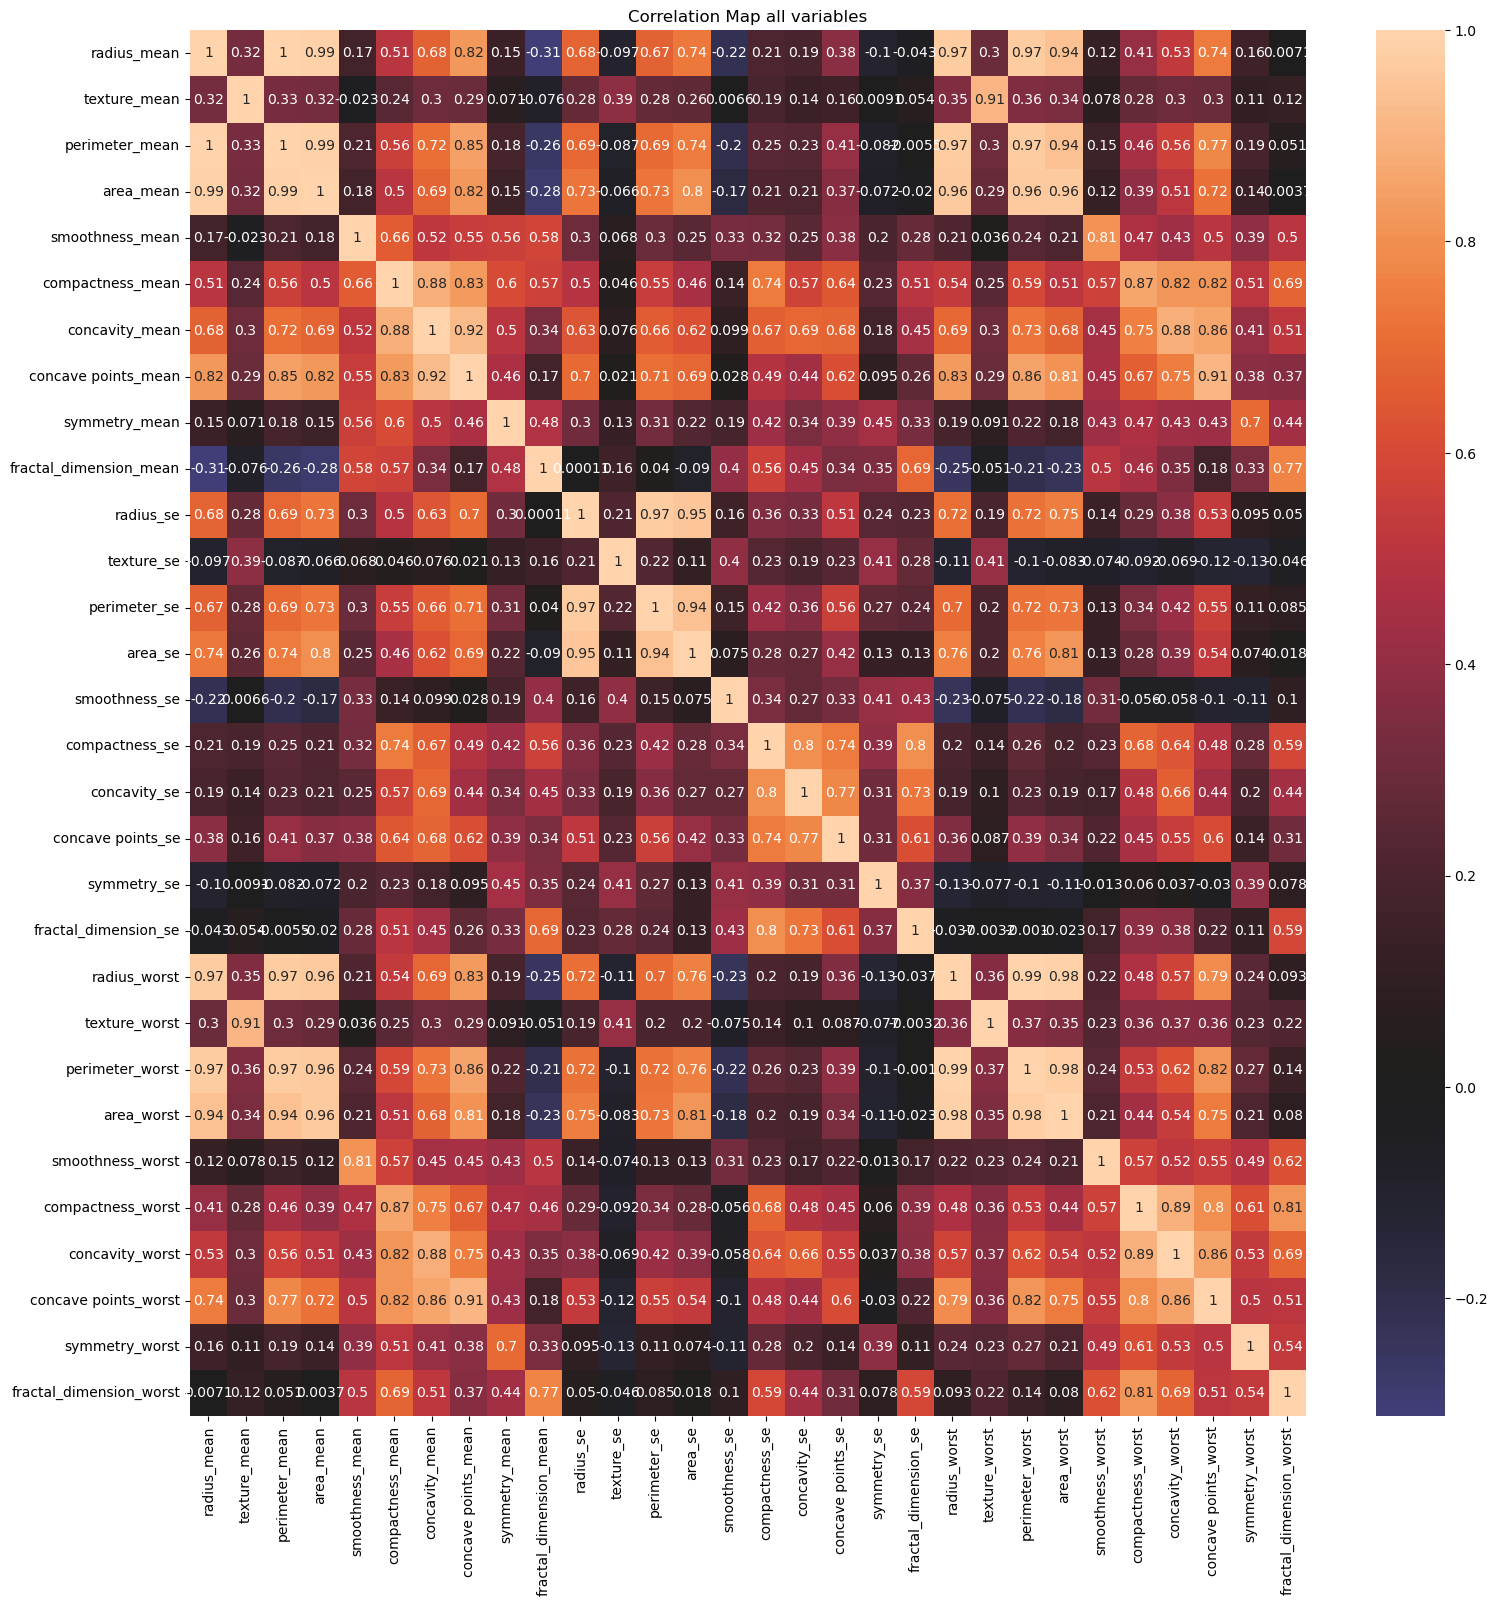

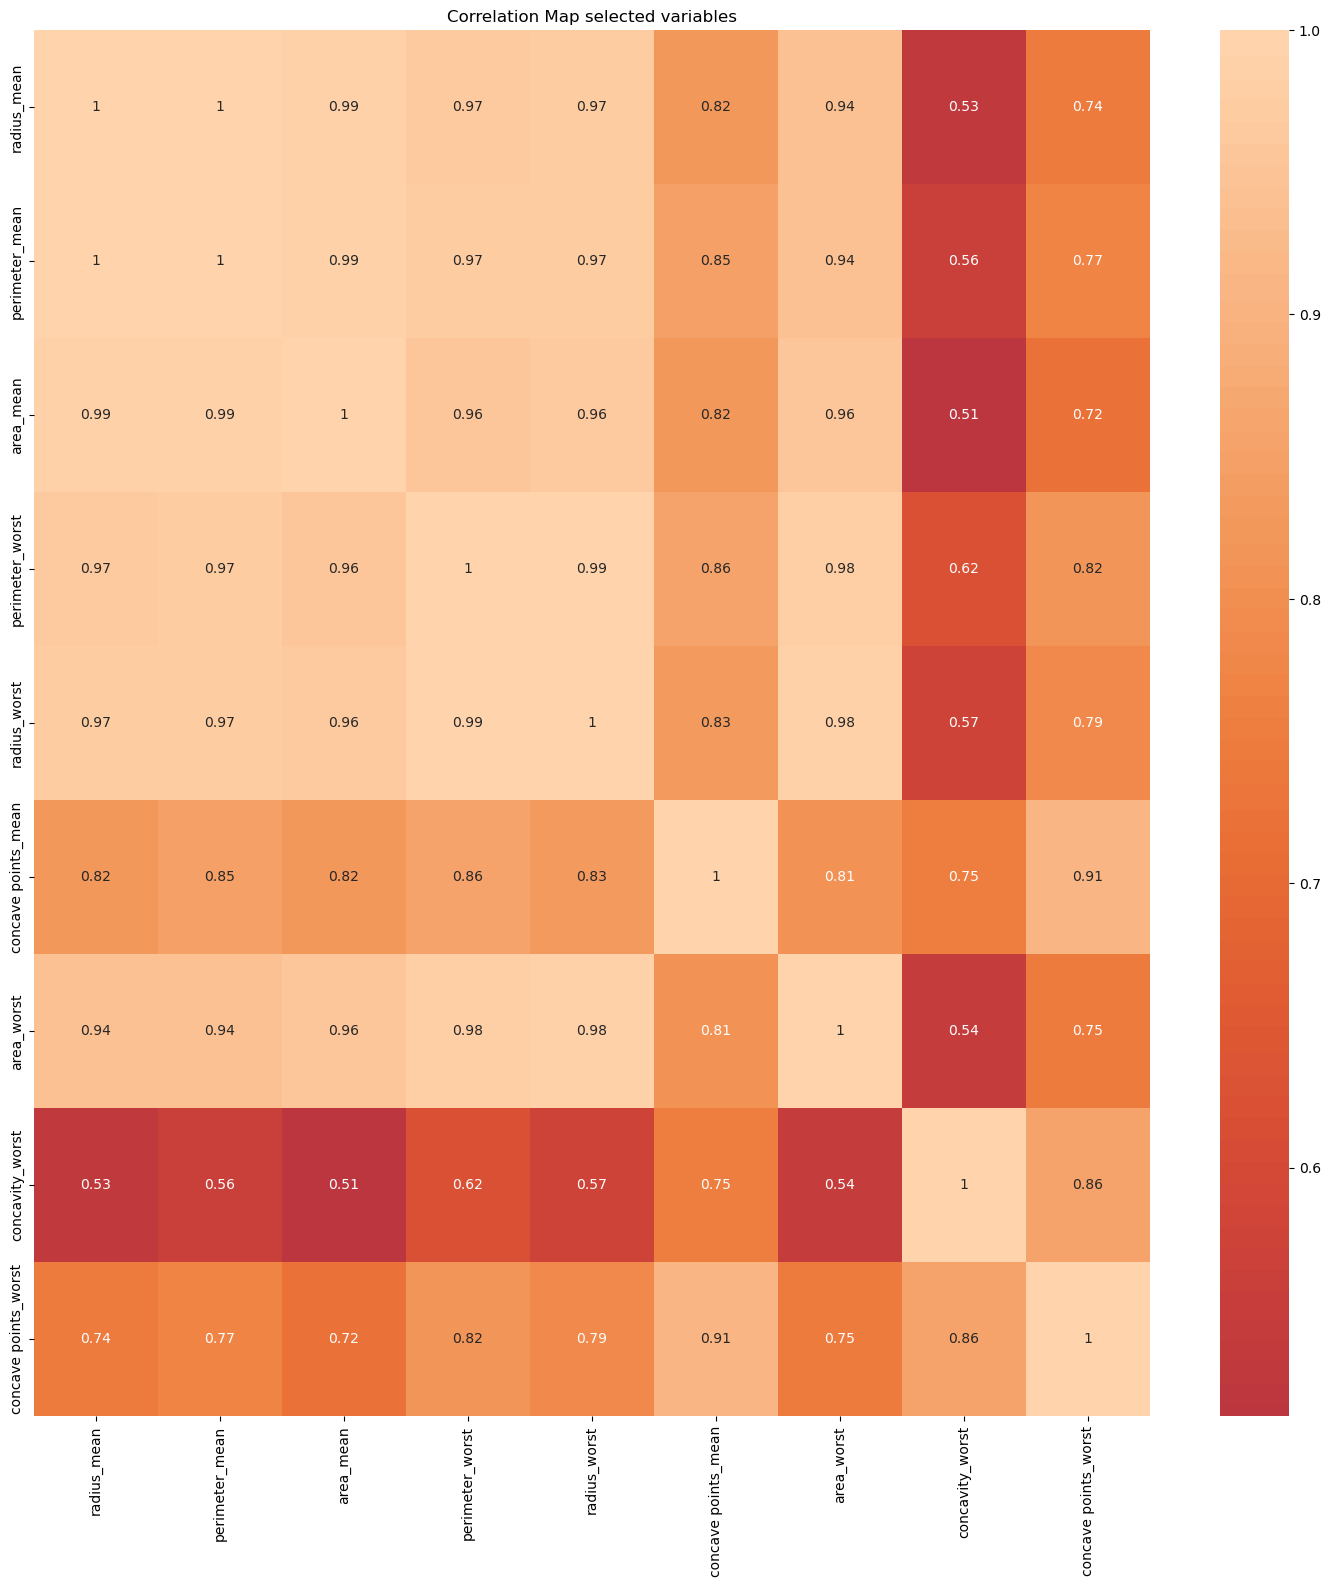

In [40]:
#Heatmap de correlation des variables
plt.figure(figsize =(18,18))
sns.heatmap(data.corr(), center=0, annot=True)
plt.title('Correlation Map all variables')
plt.show


#Heatmap de correlation des variables
plt.figure(figsize =(18,18))
sns.heatmap(data[selected_var].corr(), center=0, annot=True)
plt.title('Correlation Map selected variables')
plt.show

On observe qu'on pourrait encore supprimer des variables. Dans ce jeu de données en réalité on pourrait se contenter d'une ou deux variables par ce qu'il est prévu pour tester différentes méthodes. 

# Implémentation du KNN

In [42]:

# On retire diagnosis qui est ce qu'on veut prédire et on ne garde que les variables
X=data.drop('diagnosis', axis=1, inplace= False)

Y=data['diagnosis']

In [43]:
# On sépare le jeu de données entre l'apprentissage et le test
from sklearn.model_selection import train_test_split

# On utilise 30% des données pour le test et 70% pour l'apprentissage. 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

On utilise 70% des données pour l'apprentissage, on peut faire jouer ces paramètres dans mais il faut une proportion suffisament grande pour que l'apprentissage soit robuste. Ici le jeu de donnée est très grand (569 mesures) mais dans le cas où on aurait un jeu de données plus petits ou de s'assurer de diversifier le jeu d'apprentissage, on pourrait faire du bootstrap et de la Cross Validation. 

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

When building the predictive model, the first step is to import the “KNeighborsClassifier” class from the “sklearn.neighbors” library. In the second line, this class is initialized with one parameter, as “n_neigbours”.

This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however, to start out, 5 seems to be the most commonly used value for the KNN algorithm.